In [1]:
from diffusers import StableDiffusionPipeline, EulerAncestralDiscreteScheduler
import torch

# loading pre-trained diffusion model
model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to(
    "cuda:0"
)
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

import sys
pipe.unet.eval().half()
pipe.unet.cuda()
print('loading successfully.')

Fetching 20 files:   0%|          | 0/20 [00:00<?, ?it/s]

The config attributes {'scaling_factor': 0.18215} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.


loading successfully.


In [2]:
# loading comcat weight
from comcat_diffusion import patch_from_comcat_weight, tune_comcat_scale
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to(
    "cuda:0"
)
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)
patch_from_comcat_weight(pipe.unet, torch.load("output_example/goldendoodle/comcat_weight.pt"), rank=1)
pipe.unet.eval().half()
pipe.unet.cuda()
print('loading successfully.')

Fetching 20 files:   0%|          | 0/20 [00:00<?, ?it/s]

The config attributes {'scaling_factor': 0.18215} were passed to AutoencoderKL, but are not expected and will be ignored. Please verify your config.json configuration file.


loading successfully.


  0%|          | 0/50 [00:00<?, ?it/s]

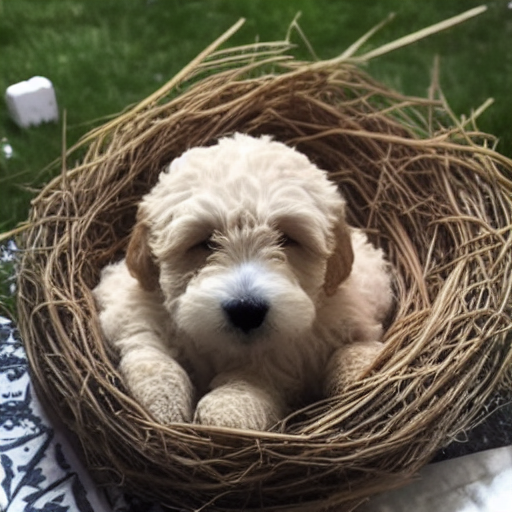

  0%|          | 0/50 [00:00<?, ?it/s]

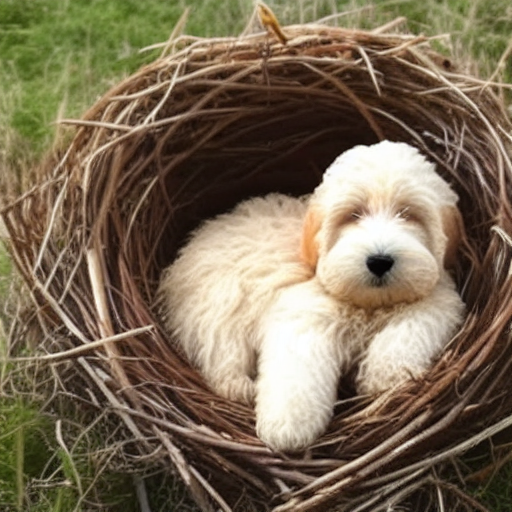

  0%|          | 0/50 [00:00<?, ?it/s]

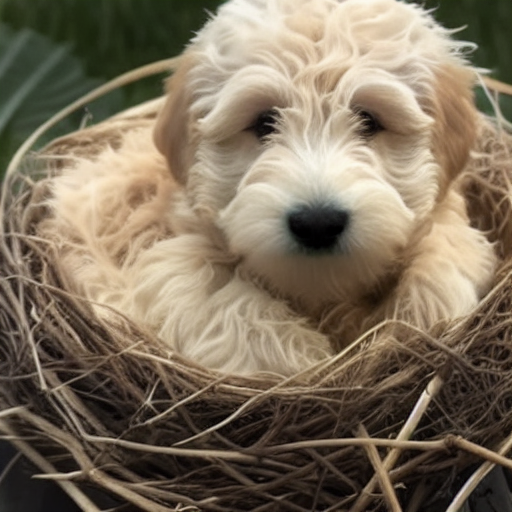

  0%|          | 0/50 [00:00<?, ?it/s]

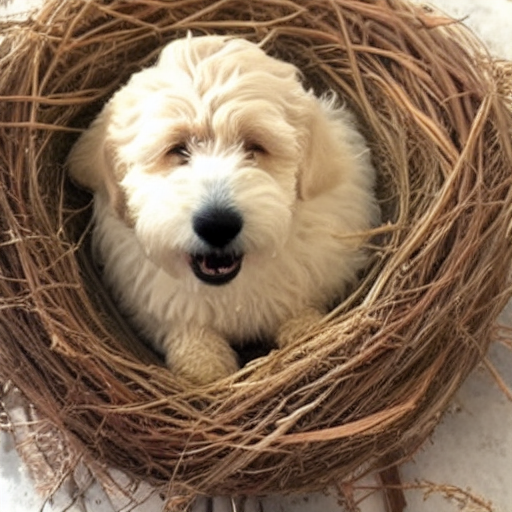

In [3]:
prompt = 'A V* goldendoodle sleeping in a bird nest'
tune_comcat_scale('unet', 0.75)
for i in [19, 23, 26, 56]:
    torch.manual_seed(i)
    image = pipe(prompt, num_inference_steps=50, guidance_scale=7).images[0]
    display(image)

In [ ]:
tune_comcat_scale('unet', 0.7)
prompt = "a V* goldendoodle wearing space suit"
for i in [1, 7, 10, 12]:
    torch.manual_seed(i)
    image = pipe(prompt, num_inference_steps=50, guidance_scale=7).images[0]
    display(image)

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
tune_comcat_scale('unet', 0.75)
prompt = "a V* goldendoodle in Times squares"
for i in [11, 25, 51]:
    torch.manual_seed(i)
    image = pipe(prompt, num_inference_steps=50, guidance_scale=7).images[0]
    display(image) # Bit better.